# DEEP LEARNING WITH PYTORCH: A 60 MINUTE BLITZ
ADDRESS：https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

In [1]:
# connect my goole drive
from google.colab import drive # Import a library named google.colab
drive.mount('/content/drive', force_remount=True) # mount the content to the directory `/content/drive`

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/ML2021
!pwd

/content/drive/MyDrive/ML2021
/content/drive/MyDrive/ML2021


## TENSORS

In [ ]:
import torch
import numpy as np
torch.cuda.is_available()

True

In [ ]:
# Tensor Initialization. Tensors can be initialized in various ways. 

# 1. Directly from data
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


In [ ]:
# 2. From a NumPy array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(x_np)

tensor([[1, 2],
        [3, 4]])


In [ ]:
# 3. From another tensor
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.5526, 0.1438],
        [0.1033, 0.6866]]) 



In [ ]:
# 4. With random or constant values
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.2024, 0.5624, 0.0820],
        [0.1822, 0.6564, 0.2963]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### Tensor Attributes

In [ ]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Tensor Operations

In [ ]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
  print(f"Device tensor is stored on: {tensor.device}")

Device tensor is stored on: cuda:0


In [ ]:
# Standard numpy-like indexing and slicing
tensor = torch.ones(4, 4)
# print(tensor)
# change row from 0 to 2
# tensor[:3] = 0
# change col as 1
tensor[:,1] = 2
tensor[:,2] = 3
tensor[:,3] = 4
print(tensor)

tensor([[1., 2., 3., 4.],
        [1., 2., 3., 4.],
        [1., 2., 3., 4.],
        [1., 2., 3., 4.]])


In [ ]:
# joining tensors: use torch.cat to concatenate a sequence of tensors along a given dimension
tensor0 = torch.ones(4, 4)
t0 = torch.cat([tensor, tensor0, tensor], dim=0)
print(t0)
t1 = torch.cat([tensor, tensor0, tensor], dim=1)
print(t1)

tensor([[1., 2., 3., 4.],
        [1., 2., 3., 4.],
        [1., 2., 3., 4.],
        [1., 2., 3., 4.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 2., 3., 4.],
        [1., 2., 3., 4.],
        [1., 2., 3., 4.],
        [1., 2., 3., 4.]])
tensor([[1., 2., 3., 4., 1., 1., 1., 1., 1., 2., 3., 4.],
        [1., 2., 3., 4., 1., 1., 1., 1., 1., 2., 3., 4.],
        [1., 2., 3., 4., 1., 1., 1., 1., 1., 2., 3., 4.],
        [1., 2., 3., 4., 1., 1., 1., 1., 1., 2., 3., 4.]])


In [ ]:
# Multiplying tensors
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[ 1.,  4.,  9., 16.],
        [ 1.,  4.,  9., 16.],
        [ 1.,  4.,  9., 16.],
        [ 1.,  4.,  9., 16.]]) 

tensor * tensor 
 tensor([[ 1.,  4.,  9., 16.],
        [ 1.,  4.,  9., 16.],
        [ 1.,  4.,  9., 16.],
        [ 1.,  4.,  9., 16.]])


In [ ]:
# computes the matrix multiplication between two tensors
# print(f"tensor:  \n {tensor} \n ")
# print(f"tensro.T： \n {tensor.T} \n")
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[30., 30., 30., 30.],
        [30., 30., 30., 30.],
        [30., 30., 30., 30.],
        [30., 30., 30., 30.]]) 

tensor @ tensor.T 
 tensor([[30., 30., 30., 30.],
        [30., 30., 30., 30.],
        [30., 30., 30., 30.],
        [30., 30., 30., 30.]])


In [ ]:
# In-place operations
# transpose tensor
tensor.t_()
print(tensor)
# add num 
tensor.add_(5)
print(tensor)
# copy tensor
tensor.copy_(tensor0)
print(tensor)

tensor([[1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [4., 4., 4., 4.]])
tensor([[6., 6., 6., 6.],
        [7., 7., 7., 7.],
        [8., 8., 8., 8.],
        [9., 9., 9., 9.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


### Bridge with NumPy

In [ ]:
# Tensor to NumPy array
# Tensors on the CPU and NumPy arrays can share their underlying memory locations
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [ ]:
# A change in the tensor reflects in the NumPy array.
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [ ]:
# NumPy array to Tensor
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([3., 3., 3., 3., 3.])
n: [3. 3. 3. 3. 3.]


## TORCH.AUTOGRAD

In [ ]:
import torch, torchvision
# load a pretrained resnet18 model from torchvision
model = torchvision.models.resnet18(pretrained=True)
# create a random data tensor to represent:
# a single image with 3 channels, and height & width of 64, and its corresponding label initialized to some random values.
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

In [ ]:
!ls
!pwd

tut1-model.pt
/content/drive/MyDrive/ML2021


In [ ]:
# run the input data through the model through each of its layers to make a prediction
prediction = model(data) # forward pass

In [ ]:
# use the model’s prediction and the corresponding label to calculate the error (loss)
loss = (prediction - labels).sum()
# backpropagate this error through the network
loss.backward() # backward pass
# Autograd then calculates and stores the gradients for each model parameter in the parameter’s .grad attribute.

In [ ]:
# we load an optimizer
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)


In [ ]:
# call .step() to initiate gradient descent. 
# The optimizer adjusts each parameter by its gradient stored in .grad
optim.step() #gradient descent

At this point, you have everything you need to train your neural network.

## NEURAL NETWORKS

### Define the network

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
# del list
# del params
# print(b)
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [ ]:
# try a random 32x32 input
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0111, -0.0671,  0.1063, -0.0887, -0.0015,  0.1604, -0.0321, -0.0341,
         -0.0462, -0.0465]], grad_fn=<AddmmBackward0>)


In [ ]:
net.zero_grad()
out.backward(torch.randn(1, 10))

### Loss Function

In [ ]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.1016, grad_fn=<MseLossBackward0>)


In [ ]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

### Backprop

In [ ]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0137, -0.0114, -0.0116,  0.0032,  0.0042, -0.0020])


### Update the weights
SGD：weight = weight - learning_rate * gradient

In [ ]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [ ]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

## TRAINING A CLASSIFIER

Training an image classifier, we will do the following steps in order:
1. Load and normalize the CIFAR10 training and test datasets using torchvision
2. Define a Convolutional Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

### 1.Load and normalize CIFAR10

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


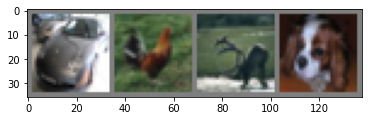

        car        bird        deer         dog


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%11s' % classes[labels[j]] for j in range(batch_size)))

### 2.Define a Convolutional Neural Network

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

### 3.Define a Loss function and optimizer

In [ ]:
# Let’s use a Classification Cross-Entropy loss and SGD with momentum.
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)
# inputs, labels = data[0].to(device), data[1].to(device)

### 4.Train the network

In [ ]:
# loop over our data iterator and feed the inputs to the network and optimize.
def train():
  for epoch in range(2):  # loop over the dataset multiple times

      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          if i % 2000 == 1999:    # print every 2000 mini-batches
              print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 2000))
              running_loss = 0.0

  print('Finished Training')
train()

[1,  2000] loss: 1.203
[1,  4000] loss: 1.226
[1,  6000] loss: 1.209
[1,  8000] loss: 1.186
[1, 10000] loss: 1.214
[1, 12000] loss: 1.187
[2,  2000] loss: 1.213
[2,  4000] loss: 1.213
[2,  6000] loss: 1.200
[2,  8000] loss: 1.175
[2, 10000] loss: 1.209
[2, 12000] loss: 1.208
Finished Training


In [ ]:
!pwd
%cd ./data

/content/drive/My Drive/ML2021/data
[Errno 2] No such file or directory: './data'
/content/drive/My Drive/ML2021/data


In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

### 5.Test the network on the test data

GroundTruth: 


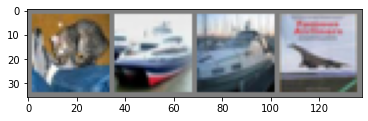

        cat        ship        ship       plane


In [ ]:
#  Let us display an image from the test set to get familiar
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
print('GroundTruth: ')
imshow(torchvision.utils.make_grid(images))
print(' '.join('%11s' % classes[labels[j]] for j in range(4)))

In [ ]:
# load back in our saved model
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
# Okay, now let us see what the neural network thinks these examples above are:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


In [ ]:
# Let us look at how the network performs on the whole dataset.
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class plane is: 58.6 %
Accuracy for class car   is: 67.9 %
Accuracy for class bird  is: 26.2 %
Accuracy for class cat   is: 27.4 %
Accuracy for class deer  is: 54.5 %
Accuracy for class dog   is: 60.5 %
Accuracy for class frog  is: 58.0 %
Accuracy for class horse is: 60.9 %
Accuracy for class ship  is: 74.8 %
Accuracy for class truck is: 58.5 %


### Training on GPU

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


In [ ]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
inputs, labels = data[0].to(device), data[1].to(device)

In [5]:
from google.colab import files
%cd /content/drive/MyDrive/'Colab Notebooks'
!ls

/content/drive/MyDrive/Colab Notebooks
'1.seq2seq Learning with Neural Networks.ipynb'
'DEEP LEARNING WITH PYTORCH.ipynb'


In [6]:
files.download('./DEEP LEARNING WITH PYTORCH.ipynb')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>